## Support Vector Machines for Binary Classcification

In [58]:
import tensorflow as tf
import numpy as np

from sklearn import datasets

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

sess = tf.Session()

In [59]:
iris = datasets.load_iris()
# iris x[0], x[3]
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])
# iris.data.shape, iris.target.shape
# len(x_vals)

In [60]:
# split data into train and test data
# 按 x_vals 的个数 * 0.8 随机生成 150内的下标数组 作为训练集
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
# list(set(range(150))) - set(array[train_indices]) 作为测试集
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
# train_indices, test_indices

# training data
x_vals_train = x_vals[train_indices]
y_vals_train = y_vals[train_indices]

# testing data
x_vals_test = x_vals[test_indices]
y_vals_test = y_vals[test_indices]

# len(x_vals_train)

In [83]:
# batch size
batch_size = 100
# placeholder
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# model variable
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [84]:
# model
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [85]:

classification_term = tf.reduce_mean(
    tf.maximum(0., 
               tf.subtract(1., 
                           tf.multiply(model_output, 
                                       y_target))))

# loss
alpha = tf.constant([0.1])
l2_norm = tf.reduce_sum(tf.square(A))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [86]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [87]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [88]:
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(2000):
    rand_index = np.random.choice(len(x_vals_train), 
                                  size=batch_size)
    
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, 
             feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, 
                         feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, 
                              feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, 
                             feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
    
    if (i+1) % 400 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
    

Step #400 A = [[-0.06153688]
 [-0.6308435 ]] b = [[-0.31346768]]
Loss = [0.47046447]
Step #800 A = [[ 0.00187654]
 [-0.9917603 ]] b = [[-0.48396772]]
Loss = [0.39364308]
Step #1200 A = [[ 0.01218205]
 [-1.1600249 ]] b = [[-0.6569672]]
Loss = [0.41385585]
Step #1600 A = [[-0.00413961]
 [-1.2276088 ]] b = [[-0.8192671]]
Loss = [0.37756884]
Step #2000 A = [[-0.00960024]
 [-1.2618295 ]] b = [[-0.9823671]]
Loss = [0.38380766]


In [89]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)

slope = -a2/a1
y_intercept = b/a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope * i + y_intercept)
    
# setosa
setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i] == 1]

# non-setosa
not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i] == -1]

# x1_vals

Text(0, 0.5, 'Sepal Length')

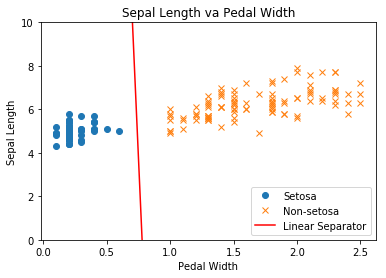

In [90]:
plt.plot(setosa_x, setosa_y, 'o', label='Setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator')
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length va Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')


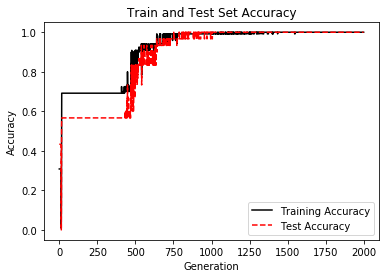

In [91]:
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Text(0, 0.5, 'Loss')

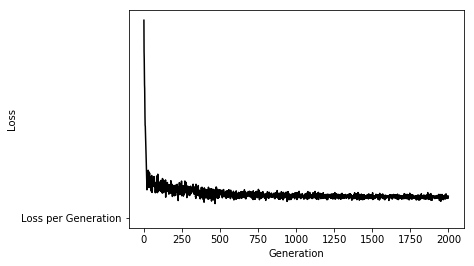

In [92]:
plt.plot(loss_vec, 'k-')
plt.plot('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')